# Naive Bayes

# SalaryData

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# load  SalaryData dataset
salary_train = pd.read_csv("C:/Users/Admin/Documents/data science assignment/Naive bayes/SalaryData_Train.csv")
salary_test = pd.read_csv("C:/Users/Admin/Documents/data science assignment/Naive bayes/SalaryData_Test.csv")

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Data Preprocessing

In [5]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [8]:
salary_train.shape

(30161, 14)

In [9]:
salary_test.shape

(15060, 14)

In [10]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


(array([1495.,  332., 1596., 3960., 1819., 1992., 2332.,   89.,  744.,
         701.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

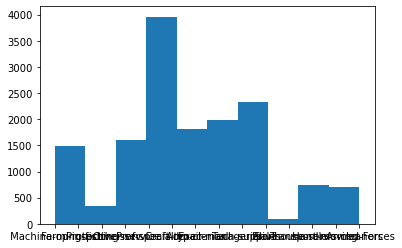

In [14]:
plt.hist((salary_test.occupation))

(array([7713., 1350., 4038., 6796., 1572.,  989., 2877., 4030.,  644.,
         152.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

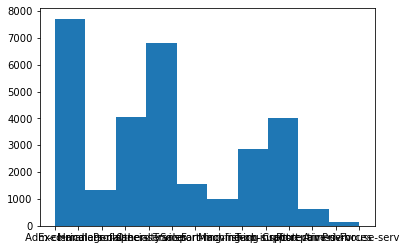

In [15]:
plt.hist((salary_train.occupation))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

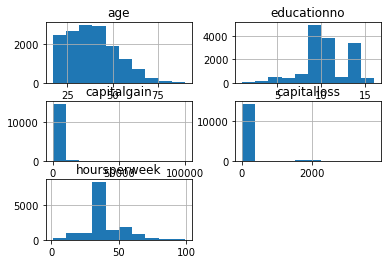

In [16]:
salary_test.hist()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

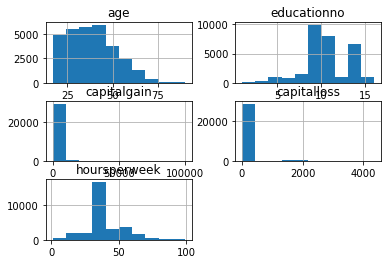

In [17]:
salary_train.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

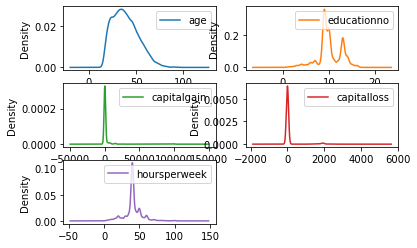

In [19]:
salary_test.plot(kind='density', subplots=True, layout=(3,2), sharex=False, sharey=False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

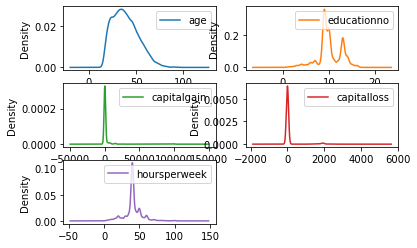

In [20]:
salary_test.plot(kind='density', subplots=True, layout=(3,2), sharex=False, sharey=False)

age                AxesSubplot(0.125,0.657941;0.352273x0.222059)
educationno     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
capitalgain        AxesSubplot(0.125,0.391471;0.352273x0.222059)
capitalloss     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
hoursperweek          AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

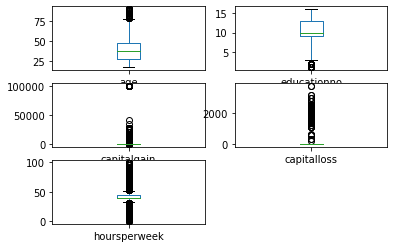

In [21]:
salary_test.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)

age                AxesSubplot(0.125,0.657941;0.352273x0.222059)
educationno     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
capitalgain        AxesSubplot(0.125,0.391471;0.352273x0.222059)
capitalloss     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
hoursperweek          AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

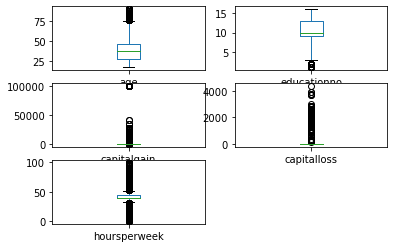

In [22]:
salary_train.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False)

[Text(0, 0, 'age'),
 Text(0, 1, 'workclass'),
 Text(0, 2, 'education'),
 Text(0, 3, 'educationno'),
 Text(0, 4, 'maritalstatus'),
 Text(0, 5, 'occupation'),
 Text(0, 6, 'relationship'),
 Text(0, 7, 'race'),
 Text(0, 8, 'sex'),
 Text(0, 9, 'capitalgain'),
 Text(0, 10, 'capitalloss'),
 Text(0, 11, 'hoursperweek'),
 Text(0, 12, 'native'),
 Text(0, 13, 'Salary')]

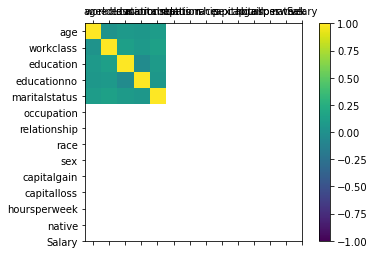

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(salary_test.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(salary_test.columns)
ax.set_yticklabels(salary_test.columns)

[Text(0, 0, 'age'),
 Text(0, 1, 'workclass'),
 Text(0, 2, 'education'),
 Text(0, 3, 'educationno'),
 Text(0, 4, 'maritalstatus'),
 Text(0, 5, 'occupation'),
 Text(0, 6, 'relationship'),
 Text(0, 7, 'race'),
 Text(0, 8, 'sex'),
 Text(0, 9, 'capitalgain'),
 Text(0, 10, 'capitalloss'),
 Text(0, 11, 'hoursperweek'),
 Text(0, 12, 'native'),
 Text(0, 13, 'Salary')]

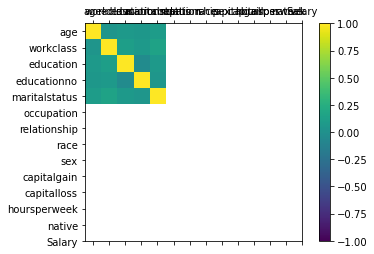

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(salary_train.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(salary_train.columns)
ax.set_yticklabels(salary_train.columns)

# Naive Bayes

In [30]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])

In [31]:
# Assign trainX,trainY,testX,testY values

colnames = salary_train.columns
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]

# GaussianNavieBayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
sgnb = GaussianNB()

# fit the model
sgnb.fit(trainX, trainY)

GaussianNB()

In [34]:
y_pred = sgnb.predict(testX)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [35]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(testY, y_pred)))

Model accuracy score: 0.7947


### Compare the train-set and test-set accuracy

In [36]:
y_pred_train = sgnb.predict(trainX)
y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(trainY, y_pred_train)))

Training-set accuracy score: 0.7953


In [38]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(sgnb.score(trainX, trainY)))

print('Test set score: {:.4f}'.format(sgnb.score(testX, testY)))

Training set score: 0.7953
Test set score: 0.7947


#### The training-set accuracy score is 0.7953 while the test-set accuracy to be 0.7947. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy
#### So, the model accuracy is 0.7947. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

#### So, we should first check the class distribution in the test set.



In [39]:
# check class distribution in test set

testY.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

#### We can see that the occurences of most frequent class is 11360. So, we can calculate null accuracy by dividing 11360 by total number of occurences.



In [40]:
# check null accuracy score

null_accuracy = (11360/(11360+3700))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7543


#### We can see that our model accuracy score is 0.7947 but null accuracy score is 0.7543. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

In [42]:
# Confusion matrix

spred_gnb = sgnb.fit(trainX,trainY).predict(testX)
confusion_matrix(testY,spred_gnb)

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

In [43]:
# print classification accuracy
#classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print ("Classification Accuracy",(10759+1209)/(10759+601+2491+1209)) # 79.4%

Classification Accuracy 0.7946879150066402


#### Classification Accuracy for GaussianNavieBayes is 79.4%

# MultinomialNavieBayes 

In [44]:
smnb = MultinomialNB()
smnb.fit(trainX, trainY)

MultinomialNB()

In [45]:
y_pred = smnb.predict(testX)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [46]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(testY, y_pred)))

Model accuracy score: 0.7750


# Compare the train-set and test-set accuracy

In [47]:
y_pred_train = smnb.predict(trainX)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [48]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(trainY, y_pred_train)))

Training-set accuracy score: 0.7729


In [49]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(smnb.score(trainX, trainY)))

print('Test set score: {:.4f}'.format(smnb.score(testX, testY)))

Training set score: 0.7729
Test set score: 0.7750


#### The training-set accuracy score is 0.7729 while the test-set accuracy to be 0.7750. These two values are quite comparable. So, there is no sign of overfitting.

### Compare model accuracy with null accuracy
#### So, the model accuracy is 0.7750. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
#### So, we should first check the class distribution in the test set.

In [50]:
# check class distribution in test set

testY.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

#### We can see that the occurences of most frequent class is 11360. So, we can calculate null accuracy by dividing 11360 by total number of occurences.

In [51]:
# check null accuracy score

null_accuracy = (11360/(11360+3700))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7543


#### We can see that our model accuracy score is 0.7750 but null accuracy score is 0.7543. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels

In [52]:
# Confusion matrix

spred_mnb = smnb.fit(trainX,trainY).predict(testX)
confusion_matrix(testY,spred_mnb)

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

In [53]:
# print classification accuracy
#classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print ("Classification Accuracy",(10891+780)/(10891+469+2420+780)) # 80%

Classification Accuracy 0.8015796703296704


#### Classification Accuracy for MultinomialNavieBayes is 80%

#### Classification Accuracy for Gaussian and Multinomial NavieBayes Accuracy is all most similar 79.4% and 80% So it is good model.

#### GaussianNavieBayes:
    ## Training set score: 0.7953
    ## Test set score: 0.7947

#### MultinomialNavieBayes:
    ## Training set score: 0.7729
    ## Test set score: 0.7750